In [0]:
# Импорт библиотек
import numpy
import pandas as pd

In [0]:
# Импорт matplotlib

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

In [0]:
# Импорт обучающей выборки
sales = pd.read_csv('monthly-car-sales-in-quebec-1960.csv', sep=';', header=0, parse_dates=[0])


In [4]:
#  Знакомимся с данными
sales.head()

,Month,Monthly car sales in Quebec 1960-1968
0,1960-01-01,6550
1,1960-02-01,8728
2,1960-03-01,12026
3,1960-04-01,14395
4,1960-05-01,14587


In [5]:
#  Знакомимся с данными
sales.shape

(108, 2)

In [6]:
#  Знакомимся с данными
sales.tail()

,Month,Monthly car sales in Quebec 1960-1968
103,1968-08-01,16722
104,1968-09-01,14385
105,1968-10-01,21342
106,1968-11-01,17180
107,1968-12-01,14577


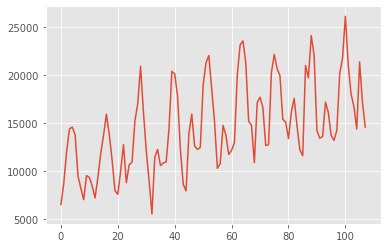

In [7]:
#  График, чтобы ответить на 4 вопроса
sales.iloc[:,1].plot()


In [8]:
# Преобразуем данные
sales_2 = pd.DataFrame()

for i in range(12,0,-1):
    sales_2['t-'+str(i)] = sales.iloc[:,1].shift(i)

sales_2['t'] = sales.iloc[:,1].values

print(sales_2.head(13))




      t-12    t-11     t-10      t-9  ...      t-3      t-2      t-1      t
0      NaN     NaN      NaN      NaN  ...      NaN      NaN      NaN   6550
1      NaN     NaN      NaN      NaN  ...      NaN      NaN   6550.0   8728
2      NaN     NaN      NaN      NaN  ...      NaN   6550.0   8728.0  12026
3      NaN     NaN      NaN      NaN  ...   6550.0   8728.0  12026.0  14395
4      NaN     NaN      NaN      NaN  ...   8728.0  12026.0  14395.0  14587
5      NaN     NaN      NaN      NaN  ...  12026.0  14395.0  14587.0  13791
6      NaN     NaN      NaN      NaN  ...  14395.0  14587.0  13791.0   9498
7      NaN     NaN      NaN      NaN  ...  14587.0  13791.0   9498.0   8251
8      NaN     NaN      NaN      NaN  ...  13791.0   9498.0   8251.0   7049
9      NaN     NaN      NaN   6550.0  ...   9498.0   8251.0   7049.0   9545
10     NaN     NaN   6550.0   8728.0  ...   8251.0   7049.0   9545.0   9364
11     NaN  6550.0   8728.0  12026.0  ...   7049.0   9545.0   9364.0   8456
12  6550.0  

In [9]:
#  Отрезаем первые 12 строк
sales_4 = sales_2[12:]

sales_4.head()

,t-12,t-11,t-10,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1,t
12,6550.0,8728.0,12026.0,14395.0,14587.0,13791.0,9498.0,8251.0,7049.0,9545.0,9364.0,8456.0,7237
13,8728.0,12026.0,14395.0,14587.0,13791.0,9498.0,8251.0,7049.0,9545.0,9364.0,8456.0,7237.0,9374
14,12026.0,14395.0,14587.0,13791.0,9498.0,8251.0,7049.0,9545.0,9364.0,8456.0,7237.0,9374.0,11837
15,14395.0,14587.0,13791.0,9498.0,8251.0,7049.0,9545.0,9364.0,8456.0,7237.0,9374.0,11837.0,13784
16,14587.0,13791.0,9498.0,8251.0,7049.0,9545.0,9364.0,8456.0,7237.0,9374.0,11837.0,13784.0,15926


In [0]:
#  предикторы и отклик разделяем
# Отклик - группирующая переменная -  вектор y
y = sales_4['t']
# Предикторы - таблица X
X = sales_4.drop('t', axis=1)

In [0]:
#  Разделяем на обучающую и тестовую выборки
#  Тестовая - последние наблюдения
X_train = X[:91]
y_train = y[:91]
X_test  = X[91:]
y_test  = y[91:]

In [12]:
#  Все хорошо?
print(sales_4.shape)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(96, 13)
(91, 12)
(91,)
(5, 12)
(5,)


In [13]:
#  Все хорошо?
print(X_train.head(5))

       t-12     t-11     t-10      t-9  ...     t-4     t-3      t-2      t-1
12   6550.0   8728.0  12026.0  14395.0  ...  7049.0  9545.0   9364.0   8456.0
13   8728.0  12026.0  14395.0  14587.0  ...  9545.0  9364.0   8456.0   7237.0
14  12026.0  14395.0  14587.0  13791.0  ...  9364.0  8456.0   7237.0   9374.0
15  14395.0  14587.0  13791.0   9498.0  ...  8456.0  7237.0   9374.0  11837.0
16  14587.0  13791.0   9498.0   8251.0  ...  7237.0  9374.0  11837.0  13784.0

[5 rows x 12 columns]


In [0]:
#  Преобразование pandas dataframe в numpy array
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values


In [15]:
from keras.models import Sequential
from keras.layers import Dense


Using TensorFlow backend.


In [16]:
#  Обучение нейронной сети 

# Creating a model
model = Sequential()
model.add(Dense(8, input_dim=12, activation='relu'))
model.add(Dense(1, activation='linear'))


# Compiling model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_percentage_error'])


# Training a model
model.fit(X_train, y_train, epochs=300, batch_size=None)



Epoch 1/300
91/91 [==============================] - 0s 3ms/step - loss: 38442478.3297 - mean_absolute_percentage_error: 40.6499
Epoch 2/300
91/91 [==============================] - 0s 104us/step - loss: 32231532.2198 - mean_absolute_percentage_error: 34.2484
Epoch 3/300
91/91 [==============================] - 0s 110us/step - loss: 30929703.9560 - mean_absolute_percentage_error: 31.2435
Epoch 4/300
91/91 [==============================] - 0s 96us/step - loss: 30640616.6593 - mean_absolute_percentage_error: 30.2150
Epoch 5/300
91/91 [==============================] - 0s 90us/step - loss: 29694379.2527 - mean_absolute_percentage_error: 29.6484
Epoch 6/300
91/91 [==============================] - 0s 90us/step - loss: 28628749.3846 - mean_absolute_percentage_error: 29.8749
Epoch 7/300
91/91 [==============================] - 0s 75us/step - loss: 26861523.8681 - mean_absolute_percentage_error: 29.7324
Epoch 8/300
91/91 [==============================] - 0s 118us/step - loss: 25993390.2198 

In [17]:
# оценка качества модели на тестовом множестве
scores = model.evaluate(X_test, y_test)
print("\nMAPE: %.2f%%" % (scores[1]))

5/5 [==============================] - 0s 4ms/step

MAPE: 12.00%


In [0]:
# Вычисляем прогноз
predictions = model.predict(X_test)


In [0]:
# Вычисляем подгонку
predictions_train = model.predict(X_train)

In [20]:
# Вспоминаем размеры таблиц
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(91, 12)
(91,)
(5, 12)
(5,)


In [0]:
#   было 108 наблюдений

#   отбросили 12 стало 96
#   train 91
#   test  5


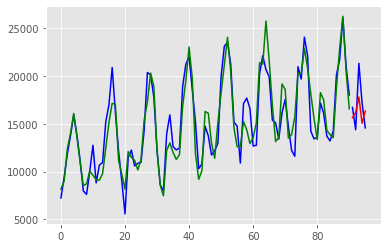

In [22]:
#   График с результатами

#   numpy.arange([start, ]stop, [step, ]dtype=None)¶

x2 = numpy.arange(0, 91, 1)

x3 = numpy.arange(91, 96, 1)


plt.plot(x2, y_train, color='blue')

plt.plot(x2, predictions_train, color='green')

plt.plot(x3, y_test, color='blue')

plt.plot(x3, predictions, color='red')



TORCH

In [0]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import torch.utils.data as Data

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

In [0]:
X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.FloatTensor(y_train)
X_test_tensor  = torch.FloatTensor(X_test)
y_test_tensor = torch.FloatTensor(y_test)

In [25]:
torch.manual_seed(42)
BATCH_SIZE = 10
EPOCH = 1000

x = X_train_tensor
y = y_train_tensor

x, y = Variable(x), Variable(y)

D_in, D_out = 12, 1

net = torch.nn.Sequential(
        torch.nn.Linear(D_in, 200),
        torch.nn.LeakyReLU(),
        torch.nn.Linear(200, 50),
        torch.nn.LeakyReLU(),
        torch.nn.Linear(50, D_out),
    )

optimizer = torch.optim.Adam(net.parameters(), lr=0.0001)
loss_func = torch.nn.MSELoss()

torch_dataset = Data.TensorDataset(x, y)
loader = Data.DataLoader(dataset=torch_dataset, 
                        batch_size=BATCH_SIZE, 
                        shuffle=True, num_workers=2,)

for epoch in range(EPOCH):
    for step, (batch_x, batch_y) in enumerate(loader):
        b_x = Variable(batch_x)
        b_y = Variable(batch_y)

        prediction = net(b_x)
        
        loss = loss_func(prediction, b_y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:432: UserWarning: Using a target size (torch.Size([10])) that is different to the input size (torch.Size([10, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:432: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [26]:
y_test_pred = net(X_test_tensor)
y_test_pred = y_test_pred.data.numpy()

mean_val = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

print("MAPE = " + str(mean_val)+"%")

MAPE = 11.651587703099446%
